In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import folium
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
import requests 
import sys
import json
import datetime as dt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes', unicode_minus=False)
warnings.filterwarnings("ignore")
import requests
import json
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

# pip install keras
# pip install tensorflow
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

## **1.데이터**

### 1.1 와이파이 AP별 이용현황 > 통합하기

In [2]:
# newjeju_wifi = pd.read_csv('newjejuwifi2021.csv')
# east_wifi = pd.read_csv('East_jeju.csv')

In [3]:
# gujeju_wifi = east_wifi[east_wifi['ap_address_detail'].str.contains('일도|이도|삼도|용담|건입|도두|화북|삼양|아라|봉개', na=False)]

In [4]:
# jejucity_wifi = pd.concat([newjeju_wifi, gujeju_wifi])

In [5]:
# jejucity_wifi.to_csv('jejucity_wifi.csv')

In [6]:
jejucity_wifi = pd.read_csv('jejucity_wifi.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'jejucity_wifi.csv'

In [ ]:
# feature 1: 일별 공공와이파이 이용자수

feature1 = pd.DataFrame(jejucity_wifi.groupby('base_date')['user_id'].count())
feature1.head()

,user_id
base_date,
20210101,39917
20210102,46504
20210103,40363
20210104,56586
20210105,54109


In [ ]:
# feature 2: 일별 버스정류소에서의 공공와이파이 이용자수

feature2 = pd.DataFrame(jejucity_wifi[jejucity_wifi['ap_category']=='버스정류소'].groupby('base_date')['user_id'].count())
feature2.rename(columns={'user_id':'bus_user_id'}, inplace=True)
feature2.head()

,bus_user_id
base_date,
20210101,29500
20210102,32923
20210103,29609
20210104,39357
20210105,39455


### 1.2 버스정류소별 이용현황

In [ ]:
# busstation= pd.read_csv('busstation2021.csv')

In [ ]:
# busstation.dropna()

In [ ]:
# west_busst = busstation[(busstation['latitude']>33.379170) & (busstation['latitude']<33.521017) & (busstation['longitude']<126.648614) & (busstation['longitude']>126.419215) & (busstation['get_on_off_type']=='승차')]

In [ ]:
# west_busst = west_busst.reset_index(drop=True)
# west_busst = west_busst[['base_date', 'day_of_week', 'base_hour', 'bus_station_name','get_on_off_type', 'user_category', 'longitude', 'latitude','user_count']]
# west_busst_long = pd.DataFrame(west_busst.groupby('bus_station_name')['longitude'].mean())
# west_busst_lat = pd.DataFrame(west_busst.groupby('bus_station_name')['latitude'].mean())
# west_busst_long['latitude'] = west_busst_lat
# west_busst_long = west_busst_long.reset_index()

In [ ]:
# with open('kakaoapikey.txt') as file:
#     APP_KEY = file.read()
 
# URL = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json'

In [ ]:
# def json_request(url='', encoding='utf-8', success=None, error=lambda e: print('%s : %s' % (e, datetime.now()), file=sys.stderr)):
#     headers = {'Authorization': 'KakaoAK {}'.format(APP_KEY)}
#     resp = requests.get(url, headers=headers)
#     # print('%s : success for request [%s]' % (datetime.now(), url))
#     return resp.text


# def reverse_geocode(longitude, latitude):
#     # 파라미터 최적화하여 url 생성
#     url = '%s?x=%s&y=%s' %(URL, longitude, latitude)
#     # json request
#     try:
#         # print('try')
#         json_req = json_request(url=url)
#         json_data = json.loads(json_req)
#         json_doc = json_data.get('documents')[0]
#         json_name = json_doc.get('address_name')
#         json_code = json_doc.get('code')
#     except:
#         # print('nan')
#         json_name = 'NaN'
#         json_code = 'NaN'
#     return json_name, json_code

 
# def get_address(x,y):
#     address = []        
#     json_name, json_code = reverse_geocode(x, y) 
#     address.append(json_name)
#     return address # 전처리 함수에서 주소 리스트 받아서 데이터프레임에 추가


# def get_code(x,y):
#     code = []        
#     json_name, json_code = reverse_geocode(x, y) 
#     code.append(json_code)
#     return code # 전처리 함수에서 행정구역코드 리스트 받아서 데이터프레임에 추가

In [ ]:
# for i in range(len(west_busst_long)): 
#     x_crd = float(west_busst_long.loc[i, ['longitude']])
#     y_crd = float(west_busst_long.loc[i, ['latitude']])
#     address = get_address(x_crd, y_crd)
#     west_busst_long.loc[i, ['ADDRESS']] = address
    
#     if i%5000 == 0:
#         print('{} 번째 경위도 좌표계에 대한 정보 불러오는 중...'.format(i))

In [ ]:
# jeju_bus21 = west_busst_long[west_busst_long['ADDRESS'].str.contains('일도|이도|삼도|용담|건입|도두|화북|삼양|아라|봉개|이호|노형|연동|오라|내도|외도|도평|해안', na=True)]

In [ ]:
# jeju_bus21_add = jeju_bus21[['bus_station_name', 'ADDRESS']]

In [ ]:
# jeju_bus2021 = pd.merge(west_busst, jeju_bus21_add, on = 'bus_station_name', how='left')

In [ ]:
# jeju_bus2021 = jeju_bus2021.dropna()

In [ ]:
# jeju_bus2021 = jeju_bus2021.reset_index(drop=True)

In [ ]:
# jeju_bus2021.to_csv('jeju_busstaition2021.csv')

In [ ]:
# jeju_bus2021.head()

In [ ]:
jeju_bus2021 = pd.read_csv('jeju_busstaition2021.csv')

In [ ]:
jeju_bus2021['day_of_week'].value_counts()

월    929129
수    911576
목    907790
화    897399
금    878696
토    779441
일    682407
Name: day_of_week, dtype: int64

In [ ]:
jeju_bus2021

,Unnamed: 0,base_date,day_of_week,base_hour,bus_station_name,get_on_off_type,user_category,longitude,latitude,user_count,ADDRESS
0,0,20211122,월,8,오광로입구 ...,승차,일반,126.45618,33.49527,1,제주특별자치도 제주시 이호이동
1,1,20211018,월,16,오광로입구 ...,승차,청소년,126.45618,33.49527,1,제주특별자치도 제주시 이호이동
2,2,20211122,월,21,오광로입구 ...,승차,일반,126.45618,33.49527,1,제주특별자치도 제주시 이호이동
3,3,20211230,목,13,오광로입구 ...,승차,청소년,126.45618,33.49527,1,제주특별자치도 제주시 이호이동
4,4,20211231,금,19,오광로입구 ...,승차,일반,126.45618,33.49527,1,제주특별자치도 제주시 이호이동
...,...,...,...,...,...,...,...,...,...,...,...
5986433,5986433,20211127,토,14,제주버스터미널 ...,승차,일반,126.51480,33.49955,1,제주특별자치도 제주시 오라일동
5986434,5986434,20211117,수,8,제주버스터미널 ...,승차,청소년,126.51480,33.49955,1,제주특별자치도 제주시 오라일동
5986435,5986435,20211117,수,8,제주버스터미널 ...,승차,일반,126.51480,33.49955,1,제주특별자치도 제주시 오라일동
5986436,5986436,20211117,수,14,제주버스터미널 ...,승차,일반,126.51480,33.49955,1,제주특별자치도 제주시 오라일동


In [ ]:
jeju_bus2021_leave = jeju_bus2021[(jeju_bus2021['base_hour'] == 17)|(jeju_bus2021['base_hour'] == 18)|(jeju_bus2021['base_hour'] == 19)|(jeju_bus2021['base_hour'] == 20)]

In [ ]:
jeju_bus2021_leave


,Unnamed: 0,base_date,day_of_week,base_hour,bus_station_name,get_on_off_type,user_category,longitude,latitude,user_count,ADDRESS
4,4,20211231,금,19,오광로입구 ...,승차,일반,126.45618,33.49527,1,제주특별자치도 제주시 이호이동
5,5,20211230,목,17,오광로입구 ...,승차,일반,126.45618,33.49527,1,제주특별자치도 제주시 이호이동
6,6,20211230,목,17,오광로입구 ...,승차,경로,126.45618,33.49527,1,제주특별자치도 제주시 이호이동
12,12,20211127,토,18,오광로입구 ...,승차,청소년,126.45618,33.49527,1,제주특별자치도 제주시 이호이동
13,13,20211120,토,20,오광로입구 ...,승차,장애 일반,126.45618,33.49527,1,제주특별자치도 제주시 이호이동
...,...,...,...,...,...,...,...,...,...,...,...
5986399,5986399,20211019,화,17,제주버스터미널 ...,승차,일반,126.51480,33.49955,1,제주특별자치도 제주시 오라일동
5986414,5986414,20211117,수,17,제주버스터미널 ...,승차,청소년,126.51480,33.49955,1,제주특별자치도 제주시 오라일동
5986424,5986424,20211121,일,19,제주버스터미널 ...,승차,일반,126.51480,33.49955,1,제주특별자치도 제주시 오라일동
5986428,5986428,20211204,토,19,제주버스터미널 ...,승차,일반,126.51480,33.49955,1,제주특별자치도 제주시 오라일동


In [ ]:
# Y: 버스승차인원

Y = pd.DataFrame(jeju_bus2021_leave.sort_values('base_date').groupby('base_date')['user_count'].sum())
Y

,user_count
base_date,
20210101,2319
20210102,2929
20210103,2636
20210104,3768
20210105,3755
...,...
20211227,4653
20211228,3620
20211229,1333


In [ ]:
# feature 3: 요일

feature3 = jeju_bus2021_leave.sort_values('base_date').groupby('base_date')['day_of_week'].max()

In [ ]:
jeju_bus2021_go = jeju_bus2021[(jeju_bus2021['base_hour'] == 7)|(jeju_bus2021['base_hour'] == 8)|(jeju_bus2021['base_hour'] == 9)]

In [ ]:
# feature12: 출근 시간대 승차 인원

feature12 = pd.DataFrame(jeju_bus2021_go.sort_values('base_date').groupby('base_date')['user_count'].sum())

In [ ]:
feature12.rename(columns={'user_count':'출근이용자'}, inplace=True)

### 1.3 내국인 유동인구

In [ ]:
# 제주 시내 유동 인구(내국인)

# Jeju_pop = pd.read_csv('Jeju_whole_pop.csv')
# Jeju_pop = Jeju_pop[Jeju_pop['emd_nm'].str.contains('일도|이도|삼도|용담|건입|도두|화북|삼양|아라|봉개|이호|노형|연동|오라|내도|외도|도평|해안', na=False)]

In [ ]:
Jeju_pop = pd.read_csv('Jeju_pop.csv')

In [ ]:
# 퇴근 시간 (17 ~ 20)

Jeju_pop = Jeju_pop[(Jeju_pop['time'] == 17)|(Jeju_pop['time'] == 18)|(Jeju_pop['time'] == 19)|(Jeju_pop['time'] == 20)]


In [ ]:
# 평균

resd_avg = Jeju_pop.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['resd_pop_cnt'].mean()
resd_sum = resd_avg.groupby(['base_date'], as_index=False)['resd_pop_cnt'].sum()

work_avg = Jeju_pop.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['work_pop_cnt'].mean()
work_sum = work_avg.groupby(['base_date'], as_index=False)['work_pop_cnt'].sum()

visit_avg = Jeju_pop.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['visit_pop_cnt'].mean()
visit_sum = visit_avg.groupby(['base_date'], as_index=False)['visit_pop_cnt'].sum()

In [ ]:
jeju_pop_avg = pd.DataFrame({'ev_resd_avg' : resd_sum['resd_pop_cnt'], 'ev_work_avg' : work_sum['work_pop_cnt'], 'ev_visit_avg' : visit_sum['visit_pop_cnt']})
ev_jeju_pop_avg = jeju_pop_avg.round(0).astype(int)
ev_jeju_pop_avg

,ev_resd_avg,ev_work_avg,ev_visit_avg
0,18467,1278,8889
1,17462,1481,9651
2,18196,1338,9184
3,16586,2303,10025
4,16648,2288,10026
...,...,...,...
360,15616,2486,11791
361,15089,2576,12234
362,15071,2506,12524
363,15012,2470,12659


In [ ]:
# 최댓값 

resd_max = Jeju_pop.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['resd_pop_cnt'].max()
resd_sum = resd_max.groupby(['base_date'], as_index=False)['resd_pop_cnt'].sum()

work_max = Jeju_pop.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['work_pop_cnt'].max()
work_sum = work_max.groupby(['base_date'], as_index=False)['work_pop_cnt'].sum()

visit_max = Jeju_pop.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['visit_pop_cnt'].max()
visit_sum = visit_max.groupby(['base_date'], as_index=False)['visit_pop_cnt'].sum()

In [ ]:
jeju_pop_max = pd.DataFrame({'ev_resd_max' : resd_sum['resd_pop_cnt'], 'ev_work_max' : work_sum['work_pop_cnt'], 'ev_visit_max' : visit_sum['visit_pop_cnt']})
ev_jeju_pop_max = jeju_pop_max.round(0).astype(int)
ev_jeju_pop_max

,ev_resd_max,ev_work_max,ev_visit_max
0,58892,5041,26453
1,57670,6169,30508
2,59542,5277,29127
3,57837,10904,33780
4,57420,11013,34467
...,...,...,...
360,55089,12523,40361
361,53338,12553,42139
362,53269,12196,43540
363,53063,11929,44282


In [ ]:
jeju_pop_maxmean = pd.concat([ev_jeju_pop_avg, ev_jeju_pop_max], axis=1)

In [ ]:
jeju_pop_maxmean.head()

,ev_resd_avg,ev_work_avg,ev_visit_avg,ev_resd_max,ev_work_max,ev_visit_max
0,18467,1278,8889,58892,5041,26453
1,17462,1481,9651,57670,6169,30508
2,18196,1338,9184,59542,5277,29127
3,16586,2303,10025,57837,10904,33780
4,16648,2288,10026,57420,11013,34467


In [ ]:
# feature4: 유동인구 퇴근 시간대 최대, 평균 그룹

feature4 = jeju_pop_maxmean
feature4

,ev_resd_avg,ev_work_avg,ev_visit_avg,ev_resd_max,ev_work_max,ev_visit_max
0,18467,1278,8889,58892,5041,26453
1,17462,1481,9651,57670,6169,30508
2,18196,1338,9184,59542,5277,29127
3,16586,2303,10025,57837,10904,33780
4,16648,2288,10026,57420,11013,34467
...,...,...,...,...,...,...
360,15616,2486,11791,55089,12523,40361
361,15089,2576,12234,53338,12553,42139
362,15071,2506,12524,53269,12196,43540
363,15012,2470,12659,53063,11929,44282


### 1.4 날씨

In [ ]:
weather = pd.read_csv('weather2021.csv')
weather.head()

,base_date,observatory_code,average_temperature,lowest_temperature,lowest_temperature_time,highest_temperature,highest_temperature_time,daily_rainfall,maximum_wind_speed,maximum_wind_speed_time,average_wind_speed,maximum_wind_speed_direction,pt_year,pt_month,observatory_code_1,observatory_name,longitude,latitude
0,20210101,862,2.7,0.4,703.0,4.6,1622.0,1.0,9.7,11.0,2.2,284.100006,2021,1,862,송당,126.7792,33.4706
1,20210101,751,2.2,0.7,530.0,3.6,1606.0,0.0,11.6,37.0,2.6,306.899994,2021,1,751,선흘,126.7090,33.4821
2,20210101,855,6.9,5.3,547.0,9.3,2221.0,0.0,14.4,40.0,7.0,330.299988,2021,1,855,가파도,126.2683,33.1733
3,20210101,868,-6.6,-8.9,511.0,-5.0,1249.0,0.0,NaN,NaN,NaN,NaN,2021,1,868,사제비,126.4980,33.3760
4,20210101,880,2.1,0.5,513.0,3.7,2259.0,0.0,10.7,37.0,2.3,309.399994,2021,1,880,금악,126.3237,33.3328


In [ ]:
weather.observatory_name.unique()

array(['송당', '선흘', '가파도', '사제비', '금악', '월정', '서광', '성판악', '대흘', '한라산남벽',
       '영실', '추자도', '기상(과)', '오등', '우도', '산천단', '태풍센터', '애월', '구좌', '외도',
       '마라도', '강정', '새별오름', '어리목', '대정', '삼각봉', '유수암', '성산수산', '한라생태숲',
       '윗세오름', '제주가시리', '표선', '한림', '진달래밭', '중문', '제주남원'], dtype=object)

In [ ]:
weather[weather.observatory_name=='외도']

,base_date,observatory_code,average_temperature,lowest_temperature,lowest_temperature_time,highest_temperature,highest_temperature_time,daily_rainfall,maximum_wind_speed,maximum_wind_speed_time,average_wind_speed,maximum_wind_speed_direction,pt_year,pt_month,observatory_code_1,observatory_name,longitude,latitude
19,20210101,863,4.5,2.9,258.0,6.4,2349.0,0.0,11.6,156.0,2.9,336.700012,2021,1,863,외도,126.4317,33.4769
57,20210102,863,4.7,-0.4,2351.0,8.3,1200.0,0.0,9.8,139.0,3.4,282.600006,2021,1,863,외도,126.4317,33.4769
101,20210103,863,3.0,-0.3,1.0,5.6,1221.0,0.0,6.5,1250.0,2.0,43.200001,2021,1,863,외도,126.4317,33.4769
112,20210104,863,5.0,0.6,410.0,9.1,1246.0,0.0,6.3,1316.0,2.0,66.199997,2021,1,863,외도,126.4317,33.4769
160,20210105,863,4.5,1.8,2115.0,7.9,730.0,0.5,10.7,906.0,2.9,18.799999,2021,1,863,외도,126.4317,33.4769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12756,20211227,863,3.2,-0.4,48.0,5.6,2227.0,2.0,8.8,825.0,2.8,67.699997,2021,12,863,외도,126.4317,33.4769
12798,20211228,863,6.1,4.3,743.0,7.8,1330.0,0.0,5.9,335.0,1.7,323.200012,2021,12,863,외도,126.4317,33.4769
12804,20211229,863,8.6,5.3,211.0,10.9,1201.0,0.0,12.6,2033.0,4.0,328.299988,2021,12,863,외도,126.4317,33.4769
12864,20211230,863,6.0,4.9,839.0,7.6,1.0,0.0,15.3,2045.0,5.7,283.899994,2021,12,863,외도,126.4317,33.4769


> 시내와 제일 가깝게 위치한 '외도'관측소를 기준으로 함

In [ ]:
weather = weather[weather.observatory_name=='외도']

In [ ]:
# feature5: 강수량

feature5 = weather.groupby('base_date')['daily_rainfall'].mean()
feature5

base_date
20210101    0.0
20210102    0.0
20210103    0.0
20210104    0.0
20210105    0.5
           ... 
20211227    2.0
20211228    0.0
20211229    0.0
20211230    0.0
20211231    0.0
Name: daily_rainfall, Length: 365, dtype: float64

In [ ]:
# feature6: 최고기온

feature6 = weather.groupby('base_date')['highest_temperature'].mean()
feature6

base_date
20210101     6.4
20210102     8.3
20210103     5.6
20210104     9.1
20210105     7.9
            ... 
20211227     5.6
20211228     7.8
20211229    10.9
20211230     7.6
20211231     5.8
Name: highest_temperature, Length: 365, dtype: float64

In [ ]:
# feature7: 최저기온

feature7 = weather.groupby('base_date')['lowest_temperature'].mean()
feature7

base_date
20210101    2.9
20210102   -0.4
20210103   -0.3
20210104    0.6
20210105    1.8
           ... 
20211227   -0.4
20211228    4.3
20211229    5.3
20211230    4.9
20211231    2.5
Name: lowest_temperature, Length: 365, dtype: float64

In [ ]:
def weather4(x):
    if x==1:
        return 4
    elif x==2:
        return 4
    elif x==3:
        return 1
    elif x==4:
        return 1
    elif x==5:
        return 1
    elif x==6:
        return 2
    elif x==7:
        return 2
    elif x==8:
        return 2
    elif x==9:
        return 3
    elif x==10:
        return 3
    elif x==11:
        return 3
    else:
        return 4


In [ ]:
# feature8: 계절

weather['season']= weather['pt_month'].apply(weather4)

In [ ]:
feature8 = weather.groupby('base_date')['season'].max()
feature8

base_date
20210101    4
20210102    4
20210103    4
20210104    4
20210105    4
           ..
20211227    4
20211228    4
20211229    4
20211230    4
20211231    4
Name: season, Length: 365, dtype: int64

In [ ]:
weather.head()

,base_date,observatory_code,average_temperature,lowest_temperature,lowest_temperature_time,highest_temperature,highest_temperature_time,daily_rainfall,maximum_wind_speed,maximum_wind_speed_time,average_wind_speed,maximum_wind_speed_direction,pt_year,pt_month,observatory_code_1,observatory_name,longitude,latitude,season
19,20210101,863,4.5,2.9,258.0,6.4,2349.0,0.0,11.6,156.0,2.9,336.700012,2021,1,863,외도,126.4317,33.4769,4
57,20210102,863,4.7,-0.4,2351.0,8.3,1200.0,0.0,9.8,139.0,3.4,282.600006,2021,1,863,외도,126.4317,33.4769,4
101,20210103,863,3.0,-0.3,1.0,5.6,1221.0,0.0,6.5,1250.0,2.0,43.200001,2021,1,863,외도,126.4317,33.4769,4
112,20210104,863,5.0,0.6,410.0,9.1,1246.0,0.0,6.3,1316.0,2.0,66.199997,2021,1,863,외도,126.4317,33.4769,4
160,20210105,863,4.5,1.8,2115.0,7.9,730.0,0.5,10.7,906.0,2.9,18.799999,2021,1,863,외도,126.4317,33.4769,4


### 1.5 제주 입도 관광객

In [ ]:
jejuin = pd.read_csv('21년 입도관광객현황_1~12.csv')

In [ ]:
jejuin.head()

,pt_month,date,day,local_in,foreigner_in,local_fore,Unnamed: 6
0,1,1,금,15261,95,15356,NaN
1,1,2,토,9412,75,9487,NaN
2,1,3,일,12135,70,12205,NaN
3,1,4,월,11833,61,11894,NaN
4,1,5,화,10939,65,11004,NaN


In [ ]:
jejuin.pt_month = jejuin.pt_month.apply(lambda x: "{:0>2d}".format(x))
jejuin.date = jejuin.date.apply(lambda x: "{:0>2d}".format(x))

In [ ]:
jejuin['ym']=jejuin['pt_month'].apply(lambda x: f'2021{x}')

In [ ]:
jejuin['base_date'] = jejuin[['ym','date']].apply(lambda x:''.join(x), axis=1)

In [ ]:
jejuin.base_date.astype('float64')

0      20210101.0
1      20210102.0
2      20210103.0
3      20210104.0
4      20210105.0
          ...    
360    20211227.0
361    20211228.0
362    20211229.0
363    20211230.0
364    20211231.0
Name: base_date, Length: 365, dtype: float64

In [ ]:
# feature9: 입도

feature9 = jejuin[['base_date','local_fore']]
feature9

,base_date,local_fore
0,20210101,15356
1,20210102,9487
2,20210103,12205
3,20210104,11894
4,20210105,11004
...,...,...
360,20211227,39615
361,20211228,36229
362,20211229,38912
363,20211230,41145


### 1.6 교통량

In [ ]:
traffic2021 = pd.read_csv('trafficday2021.csv')

In [ ]:
traffic2021.head()

,base_date,day_of_week,link_id,average_speed,average_time,pt_year,pt_month
0,20210113,수,4050181300,34,32,2021,1
1,20210113,수,4050175900,38,4,2021,1
2,20210113,수,4080029309,47,34,2021,1
3,20210113,수,4080029308,47,1,2021,1
4,20210113,수,4070009400,62,37,2021,1


In [ ]:
traffic2021['base_date'].nunique()

324

In [ ]:
traffic2021 = traffic2021.sort_values('base_date', ascending=True)

In [ ]:
len(traffic2021[traffic2021['base_date']==20210113])

3133

In [ ]:
# feature10: 평균 시간
feature10 = traffic2021.groupby('base_date')['average_time'].mean()

In [ ]:
# feature11: 평균 속력
feature11 = traffic2021.groupby('base_date')['average_speed'].mean()

### 1.3-1 출근시간대

In [ ]:
# 출근시간대 유동인구 feature13 
Jeju_pop = pd.read_csv('Jeju_pop.csv')

In [ ]:
# 출근시간대 (7 ~ 9)
Jeju_pop_mor = Jeju_pop[(Jeju_pop['time'] == 7)|(Jeju_pop['time'] == 8)|(Jeju_pop['time'] == 9)]
Jeju_pop_mor

,Unnamed: 0,base_date,time,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,pt_year,pt_month
4033,9386,20210101,7,50110510,제주시 일도1동,여성,0,97.9155,0.0000,52.0188,제주,2021,1
4034,9387,20210101,7,50110510,제주시 일도1동,여성,10,83.9276,0.0000,39.7552,제주,2021,1
4035,9388,20210101,7,50110510,제주시 일도1동,여성,20,42.5753,8.5151,73.7972,제주,2021,1
4036,9389,20210101,7,50110510,제주시 일도1동,여성,20,0.0000,0.0000,28.3835,그외,2021,1
4037,9390,20210101,7,50110510,제주시 일도1동,여성,30,100.3640,6.4751,45.3257,제주,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5965824,13490116,20211231,9,50110690,제주시 도두동,남성,60,0.0000,9.5821,83.0447,그외,2021,12
5965825,13490117,20211231,9,50110690,제주시 도두동,남성,70,48.1309,3.7024,44.4285,제주,2021,12
5965826,13490118,20211231,9,50110690,제주시 도두동,남성,70,0.0000,0.0000,25.9166,그외,2021,12
5965827,13490119,20211231,9,50110690,제주시 도두동,남성,80,42.1519,2.1977,26.3718,제주,2021,12


In [ ]:
# 평균

resd_avg = Jeju_pop_mor.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['resd_pop_cnt'].mean()
resd_sum = resd_avg.groupby(['base_date'], as_index=False)['resd_pop_cnt'].sum()

work_avg = Jeju_pop_mor.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['work_pop_cnt'].mean()
work_sum = work_avg.groupby(['base_date'], as_index=False)['work_pop_cnt'].sum()

visit_avg = Jeju_pop_mor.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['visit_pop_cnt'].mean()
visit_sum = visit_avg.groupby(['base_date'], as_index=False)['visit_pop_cnt'].sum()

jeju_pop_avg = pd.DataFrame({'mor_resd_avg' : resd_sum['resd_pop_cnt'], 'mor_work_avg' : work_sum['work_pop_cnt'], 'mor_visit_avg' : visit_sum['visit_pop_cnt']})
mor_jeju_pop_avg = jeju_pop_avg.round(0).astype(int)
mor_jeju_pop_avg

,mor_resd_avg,mor_work_avg,mor_visit_avg
0,22615,898,5077
1,22352,918,5385
2,22386,859,5070
3,21074,1401,5906
4,21153,1422,5787
...,...,...,...
360,19866,1716,7805
361,19315,1745,8135
362,19370,1696,8179
363,19355,1688,8431


In [ ]:
# 최댓값 

resd_max = Jeju_pop_mor.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['resd_pop_cnt'].max()
resd_sum = resd_max.groupby(['base_date'], as_index=False)['resd_pop_cnt'].sum()

work_max = Jeju_pop_mor.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['work_pop_cnt'].max()
work_sum = work_max.groupby(['base_date'], as_index=False)['work_pop_cnt'].sum()

visit_max = Jeju_pop_mor.groupby(['base_date', 'sex', 'age','resd'], as_index=False)['visit_pop_cnt'].max()
visit_sum = visit_max.groupby(['base_date'], as_index=False)['visit_pop_cnt'].sum()

jeju_pop_max = pd.DataFrame({'mor_resd_max' : resd_sum['resd_pop_cnt'], 'mor_work_max' : work_sum['work_pop_cnt'], 'mor_visit_max' : visit_sum['visit_pop_cnt']})
mor_jeju_pop_max = jeju_pop_max.round(0).astype(int)
mor_jeju_pop_max

,mor_resd_max,mor_work_max,mor_visit_max
0,67297,3395,14408
1,67289,3547,16273
2,67060,3104,14852
3,67703,7928,19725
4,67823,7806,19015
...,...,...,...
360,65691,12254,29501
361,65035,12433,29922
362,64687,11710,30315
363,64626,11609,30531


In [ ]:
jeju_pop_maxmean = pd.concat([mor_jeju_pop_avg, mor_jeju_pop_max], axis=1)

In [ ]:
jeju_pop_maxmean.head()

,mor_resd_avg,mor_work_avg,mor_visit_avg,mor_resd_max,mor_work_max,mor_visit_max
0,22615,898,5077,67297,3395,14408
1,22352,918,5385,67289,3547,16273
2,22386,859,5070,67060,3104,14852
3,21074,1401,5906,67703,7928,19725
4,21153,1422,5787,67823,7806,19015


In [ ]:
# feature13: 유동인구 출근 시간대 최대, 평균 그룹

feature13 = jeju_pop_maxmean
feature13

,mor_resd_avg,mor_work_avg,mor_visit_avg,mor_resd_max,mor_work_max,mor_visit_max
0,22615,898,5077,67297,3395,14408
1,22352,918,5385,67289,3547,16273
2,22386,859,5070,67060,3104,14852
3,21074,1401,5906,67703,7928,19725
4,21153,1422,5787,67823,7806,19015
...,...,...,...,...,...,...
360,19866,1716,7805,65691,12254,29501
361,19315,1745,8135,65035,12433,29922
362,19370,1696,8179,64687,11710,30315
363,19355,1688,8431,64626,11609,30531


### 1.7 데이터 정리

In [ ]:
data = pd.concat([feature1, feature2, feature3, feature5, feature6, feature7, feature8 ,feature10, feature11, feature12,Y], axis=1)
data.reset_index(drop=False, inplace=True)
data


,base_date,user_id,bus_user_id,day_of_week,daily_rainfall,highest_temperature,lowest_temperature,season,average_time,average_speed,출근이용자,user_count
0,20210101,39917.0,29500.0,금,0.0,6.4,2.9,4,NaN,NaN,1750.0,2319.0
1,20210102,46504.0,32923.0,토,0.0,8.3,-0.4,4,NaN,NaN,2208.0,2929.0
2,20210103,40363.0,29609.0,일,0.0,5.6,-0.3,4,NaN,NaN,1721.0,2636.0
3,20210104,56586.0,39357.0,월,0.0,9.1,0.6,4,NaN,NaN,3462.0,3768.0
4,20210105,54109.0,39455.0,화,0.5,7.9,1.8,4,NaN,NaN,3167.0,3755.0
...,...,...,...,...,...,...,...,...,...,...,...,...
360,20211227,67519.0,50582.0,월,2.0,5.6,-0.4,4,107.399458,38.931367,4732.0,4653.0
361,20211228,77835.0,55651.0,화,0.0,7.8,4.3,4,101.096900,40.815227,3470.0,3620.0
362,20211229,78199.0,55040.0,수,0.0,10.9,5.3,4,100.374962,40.962684,1006.0,1333.0
363,20211230,72564.0,54040.0,목,0.0,7.6,4.9,4,99.589227,41.079747,3515.0,3697.0


In [ ]:
feature13.head()

,mor_resd_avg,mor_work_avg,mor_visit_avg,mor_resd_max,mor_work_max,mor_visit_max
0,22615,898,5077,67297,3395,14408
1,22352,918,5385,67289,3547,16273
2,22386,859,5070,67060,3104,14852
3,21074,1401,5906,67703,7928,19725
4,21153,1422,5787,67823,7806,19015


In [ ]:
data = pd.concat([data, feature4['ev_resd_avg'], feature4['ev_work_avg'], feature4['ev_visit_avg'], feature4['ev_resd_max'], feature4['ev_work_max'], feature4['ev_visit_max'] ,feature13['mor_resd_avg'], feature13['mor_work_avg'], feature13['mor_visit_avg'], feature13['mor_resd_max'], feature13['mor_work_max'], feature13['mor_visit_max'],feature9['local_fore']], axis=1)

In [ ]:
data

,base_date,user_id,bus_user_id,day_of_week,daily_rainfall,highest_temperature,lowest_temperature,season,average_time,average_speed,...,ev_resd_max,ev_work_max,ev_visit_max,mor_resd_avg,mor_work_avg,mor_visit_avg,mor_resd_max,mor_work_max,mor_visit_max,local_fore
0,20210101,39917.0,29500.0,금,0.0,6.4,2.9,4,NaN,NaN,...,58892,5041,26453,22615,898,5077,67297,3395,14408,15356
1,20210102,46504.0,32923.0,토,0.0,8.3,-0.4,4,NaN,NaN,...,57670,6169,30508,22352,918,5385,67289,3547,16273,9487
2,20210103,40363.0,29609.0,일,0.0,5.6,-0.3,4,NaN,NaN,...,59542,5277,29127,22386,859,5070,67060,3104,14852,12205
3,20210104,56586.0,39357.0,월,0.0,9.1,0.6,4,NaN,NaN,...,57837,10904,33780,21074,1401,5906,67703,7928,19725,11894
4,20210105,54109.0,39455.0,화,0.5,7.9,1.8,4,NaN,NaN,...,57420,11013,34467,21153,1422,5787,67823,7806,19015,11004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,20211227,67519.0,50582.0,월,2.0,5.6,-0.4,4,107.399458,38.931367,...,55089,12523,40361,19866,1716,7805,65691,12254,29501,39615
361,20211228,77835.0,55651.0,화,0.0,7.8,4.3,4,101.096900,40.815227,...,53338,12553,42139,19315,1745,8135,65035,12433,29922,36229
362,20211229,78199.0,55040.0,수,0.0,10.9,5.3,4,100.374962,40.962684,...,53269,12196,43540,19370,1696,8179,64687,11710,30315,38912
363,20211230,72564.0,54040.0,목,0.0,7.6,4.9,4,99.589227,41.079747,...,53063,11929,44282,19355,1688,8431,64626,11609,30531,41145


- 공휴일 정보 추가


In [ ]:
# url = 'http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService/getRestDeInfo'
# AUTH_KEY = '3z8sIlJOxTVbCAOGthOC2dt8srivsPztODD2fO2Xdhfp7I29Qe8X9jrqTKq6qyGYLHnMKowstZskKGKXBgzplA=='

In [ ]:
# def getHolidays(year,month,key):
#     url = 'http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService/getRestDeInfo'

#     params = {
#         'solYear':str(year),
#         'solMonth':str(month).zfill(2),
#         '_type':'json',
#         'ServiceKey' : key
#     }

#     res = requests.get(url,params=params)
#     dic = json.loads(res.text)
#     counts = dic['response']['body']['totalCount']

#     if counts < 1 :
#         return []

#     item =  dic['response']['body']['items']['item']

#     if counts == 1:
#         return [item]

#     return item

In [ ]:
# holidays =[]
# year = '2021'
# for month in range(1,13):
#     holidays.extend(getHolidays(year,month,AUTH_KEY))

In [ ]:
# df_holiday = pd.DataFrame(holidays, columns=['locdate', 'dateName'])
# df_holiday.to_csv('holiday.csv', index=None)

In [ ]:
df_holiday = pd.read_csv('holiday.csv')

In [ ]:
df_holiday.rename(columns={'locdate':'base_date'}, inplace=True)

In [ ]:
df_holiday

,base_date,dateName
0,20210101,1월1일
1,20210211,설날
2,20210212,설날
3,20210213,설날
4,20210301,삼일절
5,20210505,어린이날
6,20210519,부처님오신날
7,20210606,현충일
8,20210815,광복절
9,20210816,대체공휴일


In [ ]:
data = pd.merge(data, df_holiday, on='base_date', how='left')

In [ ]:
data

,base_date,user_id,bus_user_id,day_of_week,daily_rainfall,highest_temperature,lowest_temperature,season,average_time,average_speed,...,ev_work_max,ev_visit_max,mor_resd_avg,mor_work_avg,mor_visit_avg,mor_resd_max,mor_work_max,mor_visit_max,local_fore,dateName
0,20210101,39917.0,29500.0,금,0.0,6.4,2.9,4,NaN,NaN,...,5041,26453,22615,898,5077,67297,3395,14408,15356,1월1일
1,20210102,46504.0,32923.0,토,0.0,8.3,-0.4,4,NaN,NaN,...,6169,30508,22352,918,5385,67289,3547,16273,9487,NaN
2,20210103,40363.0,29609.0,일,0.0,5.6,-0.3,4,NaN,NaN,...,5277,29127,22386,859,5070,67060,3104,14852,12205,NaN
3,20210104,56586.0,39357.0,월,0.0,9.1,0.6,4,NaN,NaN,...,10904,33780,21074,1401,5906,67703,7928,19725,11894,NaN
4,20210105,54109.0,39455.0,화,0.5,7.9,1.8,4,NaN,NaN,...,11013,34467,21153,1422,5787,67823,7806,19015,11004,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,20211227,67519.0,50582.0,월,2.0,5.6,-0.4,4,107.399458,38.931367,...,12523,40361,19866,1716,7805,65691,12254,29501,39615,NaN
361,20211228,77835.0,55651.0,화,0.0,7.8,4.3,4,101.096900,40.815227,...,12553,42139,19315,1745,8135,65035,12433,29922,36229,NaN
362,20211229,78199.0,55040.0,수,0.0,10.9,5.3,4,100.374962,40.962684,...,12196,43540,19370,1696,8179,64687,11710,30315,38912,NaN
363,20211230,72564.0,54040.0,목,0.0,7.6,4.9,4,99.589227,41.079747,...,11929,44282,19355,1688,8431,64626,11609,30531,41145,NaN


***

## **3. 데이터 전처리-1**

In [ ]:
data.head()

,base_date,user_id,bus_user_id,day_of_week,daily_rainfall,highest_temperature,lowest_temperature,season,average_time,average_speed,...,ev_work_max,ev_visit_max,mor_resd_avg,mor_work_avg,mor_visit_avg,mor_resd_max,mor_work_max,mor_visit_max,local_fore,dateName
0,20210101,39917.0,29500.0,금,0.0,6.4,2.9,4,NaN,NaN,...,5041,26453,22615,898,5077,67297,3395,14408,15356,1월1일
1,20210102,46504.0,32923.0,토,0.0,8.3,-0.4,4,NaN,NaN,...,6169,30508,22352,918,5385,67289,3547,16273,9487,NaN
2,20210103,40363.0,29609.0,일,0.0,5.6,-0.3,4,NaN,NaN,...,5277,29127,22386,859,5070,67060,3104,14852,12205,NaN
3,20210104,56586.0,39357.0,월,0.0,9.1,0.6,4,NaN,NaN,...,10904,33780,21074,1401,5906,67703,7928,19725,11894,NaN
4,20210105,54109.0,39455.0,화,0.5,7.9,1.8,4,NaN,NaN,...,11013,34467,21153,1422,5787,67823,7806,19015,11004,NaN


- 와이파이 데이터 결측치

In [ ]:
date = data[data['user_id'].isnull()]['base_date'].values
date[0]

columns = ['user_id', 'bus_user_id']

for i in range(len(date)):
    for column in columns:
        data.loc[data['base_date']==date[i], (column)] = data[data['base_date']==date[i]-7][column].values[0]

In [ ]:
data['user_count'].fillna(2486, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   base_date            365 non-null    int64  
 1   user_id              365 non-null    float64
 2   bus_user_id          365 non-null    float64
 3   day_of_week          364 non-null    object 
 4   daily_rainfall       365 non-null    float64
 5   highest_temperature  362 non-null    float64
 6   lowest_temperature   362 non-null    float64
 7   season               365 non-null    int64  
 8   average_time         324 non-null    float64
 9   average_speed        324 non-null    float64
 10  출근이용자                364 non-null    float64
 11  user_count           365 non-null    float64
 12  ev_resd_avg          365 non-null    int32  
 13  ev_work_avg          365 non-null    int32  
 14  ev_visit_avg         365 non-null    int32  
 15  ev_resd_max          365 non-null    int

- 기온

In [ ]:
data['highest_temperature'] = data['highest_temperature'].fillna(15.3)
data['lowest_temperature'] = data['lowest_temperature'].fillna(7.6)

- 교통량

In [ ]:
# 일단 평균으로

data['average_time'] = data['average_time'].fillna(traffic2021['average_time'].mean())
data['average_speed'] = data['average_speed'].fillna(traffic2021['average_speed'].mean())

### 3.1 공휴일

In [ ]:
# data['dateName'] = data['dateName'].apply(lambda x: 1 if x ~ 0)

In [ ]:
data['dateName'].fillna(0, inplace=True)

In [ ]:
data['dateName'].unique()

array(['1월1일', 0, '설날', '삼일절', '어린이날', '부처님오신날', '현충일', '광복절', '대체공휴일',
       '추석', '개천절', '한글날', '기독탄신일'], dtype=object)

In [ ]:
def trans_one(x):
    if x !=0:
        return 1
    return 0    
data['dateName'].apply(trans_one)

0      1
1      0
2      0
3      0
4      0
      ..
360    0
361    0
362    0
363    0
364    0
Name: dateName, Length: 365, dtype: int64

In [ ]:
data['dateName_1'] = data['dateName'].apply(trans_one)

- 주말 추가

In [ ]:
data.head()

,base_date,user_id,bus_user_id,day_of_week,daily_rainfall,highest_temperature,lowest_temperature,season,average_time,average_speed,...,ev_visit_max,mor_resd_avg,mor_work_avg,mor_visit_avg,mor_resd_max,mor_work_max,mor_visit_max,local_fore,dateName,dateName_1
0,20210101,39917.0,29500.0,금,0.0,6.4,2.9,4,51.159975,41.835915,...,26453,22615,898,5077,67297,3395,14408,15356,1월1일,1
1,20210102,46504.0,32923.0,토,0.0,8.3,-0.4,4,51.159975,41.835915,...,30508,22352,918,5385,67289,3547,16273,9487,0,0
2,20210103,40363.0,29609.0,일,0.0,5.6,-0.3,4,51.159975,41.835915,...,29127,22386,859,5070,67060,3104,14852,12205,0,0
3,20210104,56586.0,39357.0,월,0.0,9.1,0.6,4,51.159975,41.835915,...,33780,21074,1401,5906,67703,7928,19725,11894,0,0
4,20210105,54109.0,39455.0,화,0.5,7.9,1.8,4,51.159975,41.835915,...,34467,21153,1422,5787,67823,7806,19015,11004,0,0


In [ ]:
def weekend(x):
    if (x == '토' or x == '일'):
        return 1
    else:
        return 0

In [ ]:
data['weekend'] = data['day_of_week'].apply(weekend)

In [ ]:
def holi(x):
    if x >= 1:
        return 1
    else:
        return 0

In [ ]:
data['dn_weekend'] = data['dateName_1'] + data['weekend']

In [ ]:
data['holiday'] = data['dn_weekend'].apply(holi)

In [ ]:
data.columns

Index(['base_date', 'user_id', 'bus_user_id', 'day_of_week', 'daily_rainfall',
       'highest_temperature', 'lowest_temperature', 'season', 'average_time',
       'average_speed', '출근이용자', 'user_count', 'ev_resd_avg', 'ev_work_avg',
       'ev_visit_avg', 'ev_resd_max', 'ev_work_max', 'ev_visit_max',
       'mor_resd_avg', 'mor_work_avg', 'mor_visit_avg', 'mor_resd_max',
       'mor_work_max', 'mor_visit_max', 'local_fore', 'dateName', 'dateName_1',
       'weekend', 'dn_weekend', 'holiday'],
      dtype='object')

In [ ]:
data.head()

,base_date,user_id,bus_user_id,day_of_week,daily_rainfall,highest_temperature,lowest_temperature,season,average_time,average_speed,...,mor_visit_avg,mor_resd_max,mor_work_max,mor_visit_max,local_fore,dateName,dateName_1,weekend,dn_weekend,holiday
0,20210101,39917.0,29500.0,금,0.0,6.4,2.9,4,51.159975,41.835915,...,5077,67297,3395,14408,15356,1월1일,1,0,1,1
1,20210102,46504.0,32923.0,토,0.0,8.3,-0.4,4,51.159975,41.835915,...,5385,67289,3547,16273,9487,0,0,1,1,1
2,20210103,40363.0,29609.0,일,0.0,5.6,-0.3,4,51.159975,41.835915,...,5070,67060,3104,14852,12205,0,0,1,1,1
3,20210104,56586.0,39357.0,월,0.0,9.1,0.6,4,51.159975,41.835915,...,5906,67703,7928,19725,11894,0,0,0,0,0
4,20210105,54109.0,39455.0,화,0.5,7.9,1.8,4,51.159975,41.835915,...,5787,67823,7806,19015,11004,0,0,0,0,0


In [ ]:
data = data[['base_date', 'user_id', 'bus_user_id', 'daily_rainfall', 'highest_temperature', 'lowest_temperature', 'season', 'average_time', 'average_speed','출근이용자','ev_resd_avg', 'ev_work_avg',
       'ev_visit_avg', 'ev_resd_max', 'ev_work_max', 'ev_visit_max','mor_resd_avg', 'mor_work_avg',
       'mor_visit_avg', 'mor_resd_max', 'mor_work_max', 'mor_visit_max','local_fore', 'holiday', 'user_count']]

In [ ]:
data.head()

,base_date,user_id,bus_user_id,daily_rainfall,highest_temperature,lowest_temperature,season,average_time,average_speed,출근이용자,...,ev_visit_max,mor_resd_avg,mor_work_avg,mor_visit_avg,mor_resd_max,mor_work_max,mor_visit_max,local_fore,holiday,user_count
0,20210101,39917.0,29500.0,0.0,6.4,2.9,4,51.159975,41.835915,1750.0,...,26453,22615,898,5077,67297,3395,14408,15356,1,2319.0
1,20210102,46504.0,32923.0,0.0,8.3,-0.4,4,51.159975,41.835915,2208.0,...,30508,22352,918,5385,67289,3547,16273,9487,1,2929.0
2,20210103,40363.0,29609.0,0.0,5.6,-0.3,4,51.159975,41.835915,1721.0,...,29127,22386,859,5070,67060,3104,14852,12205,1,2636.0
3,20210104,56586.0,39357.0,0.0,9.1,0.6,4,51.159975,41.835915,3462.0,...,33780,21074,1401,5906,67703,7928,19725,11894,0,3768.0
4,20210105,54109.0,39455.0,0.5,7.9,1.8,4,51.159975,41.835915,3167.0,...,34467,21153,1422,5787,67823,7806,19015,11004,0,3755.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   base_date            365 non-null    int64  
 1   user_id              365 non-null    float64
 2   bus_user_id          365 non-null    float64
 3   daily_rainfall       365 non-null    float64
 4   highest_temperature  365 non-null    float64
 5   lowest_temperature   365 non-null    float64
 6   season               365 non-null    int64  
 7   average_time         365 non-null    float64
 8   average_speed        365 non-null    float64
 9   출근이용자                364 non-null    float64
 10  ev_resd_avg          365 non-null    int32  
 11  ev_work_avg          365 non-null    int32  
 12  ev_visit_avg         365 non-null    int32  
 13  ev_resd_max          365 non-null    int32  
 14  ev_work_max          365 non-null    int32  
 15  ev_visit_max         365 non-null    int

In [ ]:
data['출근이용자'] = data['출근이용자'].fillna(data['출근이용자'].mean())

### 3.2 와이파이 결측치

In [ ]:
# date = data[data['user_id'].isnull()]['base_date'].values
# date[0]

> 관광객수 증가로 평균값 대체는 부정확하다고 판단.
> 그 전 주 값으로 대체

In [ ]:
# columns = ['user_id', 'bus_user_id']

# for i in range(len(date)):
#     for column in columns:
#         data.loc[data['base_date']==date[i], (column)] = data[data['base_date']==date[i]-7][column].values[0]

### 3.3 기타 결측치

In [ ]:
# data.groupby('day_of_week')['user_count'].mean()	

> 평균값으로 대체

### 3.4 기온

In [ ]:
# data[data['highest_temperature'].isnull()]

In [ ]:
# data[data['base_date']==20210323]

In [ ]:
# data[data['base_date']==20210318]

> 3월 19,20은 강수량 있음    
> 3월 18일, 23일 비교시 큰 차이 없음    
> 3월 23일 값으로 대체

In [ ]:
# data['highest_temperature'] = data['highest_temperature'].fillna(15.3)
# data['lowest_temperature'] = data['lowest_temperature'].fillna(7.8)

## **4. EDA-1**

### 4.1 요일에 따른 승차인원

In [ ]:
jeju_bus2021_day = pd.DataFrame(jeju_bus2021.groupby('day_of_week')['user_count'].sum())
jeju_bus2021_day.user_count

day_of_week
금    939694
목    968947
수    972824
월    988859
일    741880
토    841535
화    955105
Name: user_count, dtype: int64

<AxesSubplot:xlabel='day_of_week', ylabel='user_count'>

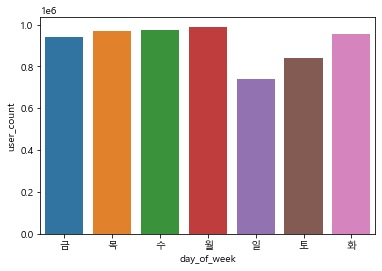

In [ ]:
sns.barplot(data=jeju_bus2021_day, x=jeju_bus2021_day.index, y=jeju_bus2021_day.user_count)

### 4.2 시간대별 승차인원

In [ ]:
jeju_bus2021_time = pd.DataFrame(jeju_bus2021.groupby('base_hour')['user_count'].sum())
jeju_bus2021_time

,user_count
base_hour,
0,4431
1,18
2,1
3,2
5,25792
6,245218
7,425268
8,443416
9,393682


No handles with labels found to put in legend.


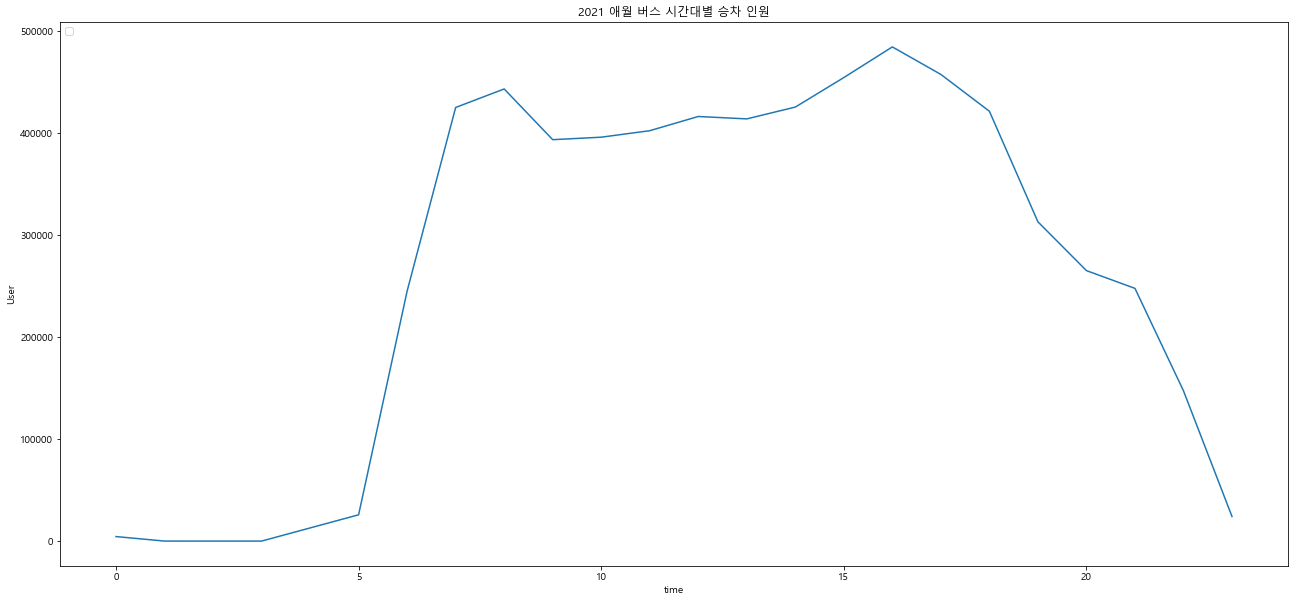

In [ ]:
plt.figure(figsize=(22,10))
plt.plot(jeju_bus2021_time.index, jeju_bus2021_time.user_count)
plt.title("2021 애월 버스 시간대별 승차 인원")
plt.legend(loc=2)
plt.xlabel("time")
plt.ylabel("User")
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   base_date            365 non-null    int64  
 1   user_id              365 non-null    float64
 2   bus_user_id          365 non-null    float64
 3   daily_rainfall       365 non-null    float64
 4   highest_temperature  365 non-null    float64
 5   lowest_temperature   365 non-null    float64
 6   season               365 non-null    int64  
 7   average_time         365 non-null    float64
 8   average_speed        365 non-null    float64
 9   출근이용자                365 non-null    float64
 10  ev_resd_avg          365 non-null    int32  
 11  ev_work_avg          365 non-null    int32  
 12  ev_visit_avg         365 non-null    int32  
 13  ev_resd_max          365 non-null    int32  
 14  ev_work_max          365 non-null    int32  
 15  ev_visit_max         365 non-null    int

### 4.3 히트맵

In [ ]:
heatmap_data = data[['base_date', 'user_id', 'bus_user_id', 'daily_rainfall', 'highest_temperature', 'lowest_temperature', 'season', 'average_time', 'average_speed','출근이용자','ev_resd_avg', 'ev_work_avg',
       'ev_visit_avg', 'ev_resd_max', 'ev_work_max', 'ev_visit_max','mor_resd_avg', 'mor_work_avg',
       'mor_visit_avg', 'mor_resd_max', 'mor_work_max', 'mor_visit_max','local_fore', 'holiday', 'user_count']]

<AxesSubplot:>

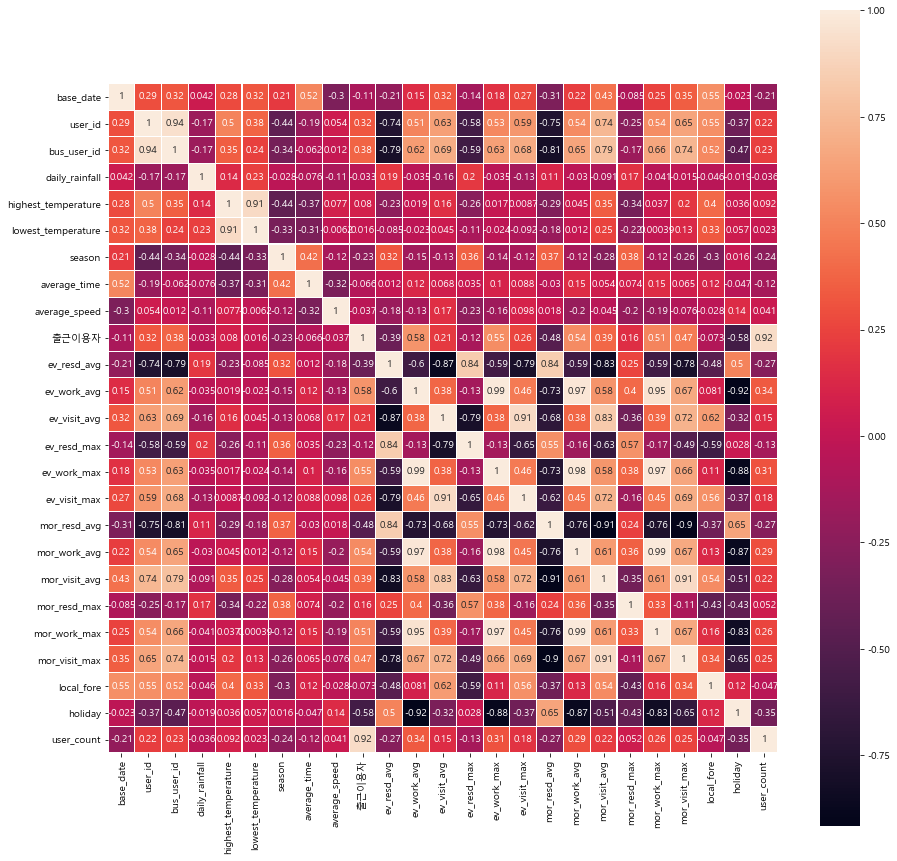

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, linecolor = "white", annot = True, annot_kws = {"size" : 10})

- '출근이용자', 'holiday', 'ev_work_avg', 'ev_work_max',
- 'mor_work_avg', 'ev_resd_avg', 'mor_resd_avg', 'mor_work_max', 'mor_visit_max', 'season', 'bus_user_id', 'mor_visit_avg', 'user_id'  

In [ ]:
data = data[['base_date','출근이용자', 'holiday', 'ev_work_avg', 'ev_work_max',
 'mor_work_avg', 'ev_resd_avg', 'mor_resd_avg', 'mor_work_max', 'mor_visit_max', 
 'season', 'bus_user_id', 'mor_visit_avg', 'user_id']]

In [ ]:
# 날짜 datetime 형식으로 변환
data['base_date'] = data['base_date'].astype(str)
data['base_date'] = pd.to_datetime(data['base_date'])

In [ ]:
data.index = data['base_date']
data.set_index('base_date', inplace=True)

In [ ]:
data

,user_id,bus_user_id,season,출근이용자,ev_resd_avg,ev_work_avg,ev_work_max,mor_resd_avg,mor_work_avg,mor_visit_avg,mor_work_max,mor_visit_max,holiday,user_count
base_date,,,,,,,,,,,,,,
2021-01-01,39917.0,29500.0,4,1750.0,18467,1278,5041,22615,898,5077,3395,14408,1,2319.0
2021-01-02,46504.0,32923.0,4,2208.0,17462,1481,6169,22352,918,5385,3547,16273,1,2929.0
2021-01-03,40363.0,29609.0,4,1721.0,18196,1338,5277,22386,859,5070,3104,14852,1,2636.0
2021-01-04,56586.0,39357.0,4,3462.0,16586,2303,10904,21074,1401,5906,7928,19725,0,3768.0
2021-01-05,54109.0,39455.0,4,3167.0,16648,2288,11013,21153,1422,5787,7806,19015,0,3755.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,67519.0,50582.0,4,4732.0,15616,2486,12523,19866,1716,7805,12254,29501,0,4653.0
2021-12-28,77835.0,55651.0,4,3470.0,15089,2576,12553,19315,1745,8135,12433,29922,0,3620.0
2021-12-29,78199.0,55040.0,4,1006.0,15071,2506,12196,19370,1696,8179,11710,30315,0,1333.0


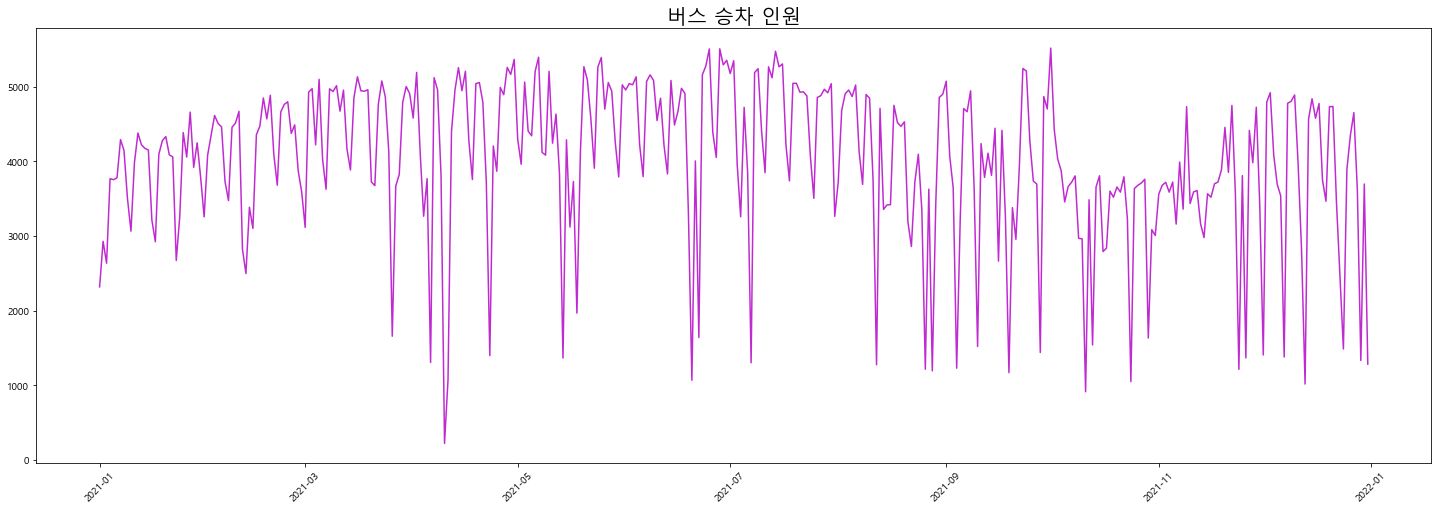

In [ ]:
fig = plt.figure(figsize=(25,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(data.index, data['user_count'],color='#c02ad1') ## 선그래프 생성
 
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 45도 회전 
plt.title('버스 승차 인원',fontsize=20) ## 타이틀 설정
plt.show()

- 월별

<AxesSubplot:xlabel='base_date'>

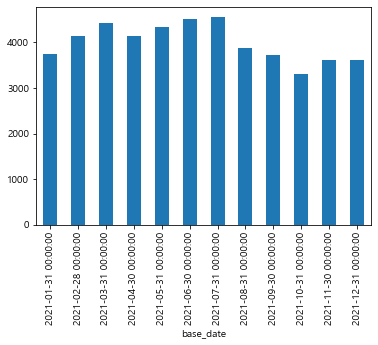

In [ ]:
data['user_count'].resample('M').mean().plot(kind='bar')

- rolling

<AxesSubplot:xlabel='base_date'>

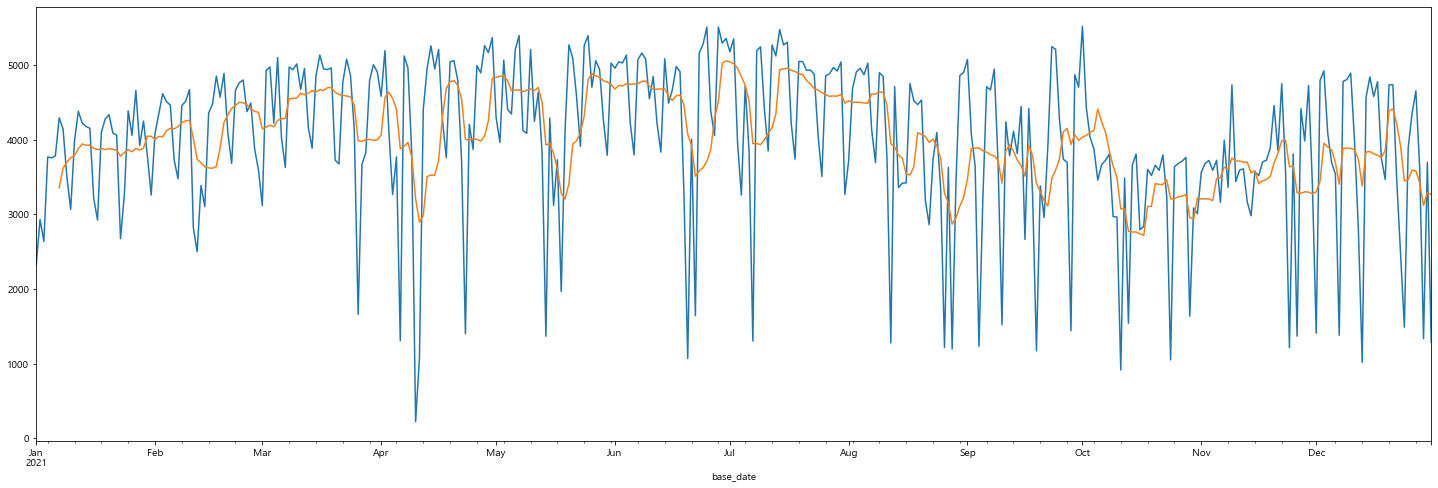

In [ ]:
fig = plt.figure(figsize=(25,8))
data['user_count'].plot()
data.rolling(window=7).mean()['user_count'].plot() # 트랜드 곡선

***

***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import folium
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
import requests 
import sys
import json
import datetime as dt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes', unicode_minus=False)
warnings.filterwarnings("ignore")
import requests
import json
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

# pip install keras
# pip install tensorflow
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Unnamed: 0,base_date,user_id,bus_user_id,daily_rainfall,highest_temperature,lowest_temperature,season,average_time,average_speed,...,ev_visit_max,mor_resd_avg,mor_work_avg,mor_visit_avg,mor_resd_max,mor_work_max,mor_visit_max,local_fore,holiday,user_count
0,0,20210101,39917.0,29500.0,0.0,6.4,2.9,4,51.159975,41.835915,...,26453,22615,898,5077,67297,3395,14408,15356,1,2319.0
1,1,20210102,46504.0,32923.0,0.0,8.3,-0.4,4,51.159975,41.835915,...,30508,22352,918,5385,67289,3547,16273,9487,1,2929.0
2,2,20210103,40363.0,29609.0,0.0,5.6,-0.3,4,51.159975,41.835915,...,29127,22386,859,5070,67060,3104,14852,12205,1,2636.0
3,3,20210104,56586.0,39357.0,0.0,9.1,0.6,4,51.159975,41.835915,...,33780,21074,1401,5906,67703,7928,19725,11894,0,3768.0
4,4,20210105,54109.0,39455.0,0.5,7.9,1.8,4,51.159975,41.835915,...,34467,21153,1422,5787,67823,7806,19015,11004,0,3755.0


## **5. 모델링**

- train, test

In [4]:
len(data)

365

In [5]:
TEST_SIZE = 80
WINDOW_SIZE = 20

train = data[:-TEST_SIZE]
test = data[-TEST_SIZE:]

- 정규화

In [6]:
# https://mole-starseeker.tistory.com/31
# 타 피쳐가 다른 피쳐를 지배하지 못하도록 h, 모델이 잘 알아들을 수 있게 데이터 정제 
#  과적합 문제 해결 기법이므로 과소적합된 지금 보류해야 할지 
# 선택 아닌 필수 고려사항 (..)

# minmax 이상치에 취약, 이상치가 있다면 다른 값들이 치우치게 됨, 데이터 분포가 정규분포 아닐 때 시도 
# Z 점수 정규화(표준화) > 데이터가 표준정규분포(가우시안 분포)에 해당하도록 값을 바꿔줌

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

feature_cols = ['base_date','출근이용자', 'holiday', 'ev_work_avg', 'ev_work_max', 'mor_work_avg', 
        'ev_resd_avg', 'mor_resd_avg', 'mor_work_max', 'mor_visit_max', 
        'season', 'bus_user_id', 'mor_visit_avg', 'user_id']
data_scaled = scaler.fit_transform(train[feature_cols])
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = feature_cols

data_scaled

,base_date,출근이용자,holiday,ev_work_avg,ev_work_max,mor_work_avg,ev_resd_avg,mor_resd_avg,mor_work_max,mor_visit_max,season,bus_user_id,mor_visit_avg,user_id
0,0.000000,0.322362,1.0,0.177489,0.106473,0.172218,0.835916,0.901514,0.066110,0.016870,1.000000,0.061676,0.079514,0.059463
1,0.001098,0.413724,1.0,0.275132,0.194653,0.186393,0.652689,0.852364,0.077974,0.098805,1.000000,0.125631,0.151543,0.140406
2,0.002195,0.316577,1.0,0.206349,0.124922,0.144578,0.786509,0.858718,0.043397,0.036376,1.000000,0.063712,0.077877,0.064944
3,0.003293,0.663874,0.0,0.670515,0.564806,0.528703,0.492981,0.613530,0.419919,0.250461,1.000000,0.245843,0.273386,0.264297
4,0.004391,0.605027,0.0,0.663300,0.573327,0.543586,0.504284,0.628294,0.410397,0.219269,1.000000,0.247674,0.245557,0.233859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,0.995609,0.691602,0.0,0.752285,0.678080,0.842665,0.132361,0.180153,0.837652,0.787936,0.666667,0.795243,0.806595,0.804394
281,0.996707,0.410932,1.0,0.295815,0.250156,0.217576,0.301003,0.564567,0.107946,0.367542,0.666667,0.522570,0.537184,0.525818
282,0.997805,0.392380,1.0,0.222222,0.191291,0.125443,0.364084,0.555036,0.053778,0.407302,0.666667,0.444976,0.519645,0.567377
283,0.998902,0.110712,1.0,0.362674,0.290807,0.206945,0.465087,0.558400,0.119107,0.466391,0.666667,0.459288,0.565716,0.544644


In [8]:
def make_dataset(data, label, window_size):    # 과거 20일을 기준으로 예측 
    feature_list = []
    label_list = []
    label = list(np.array(label).flatten())
    
    for i in range(len(data) - window_size*2):
        new_window_size = i + window_size
        feature_list.append(np.array(data.iloc[i : new_window_size]))
        label_list.append(label[new_window_size : new_window_size + window_size])
    return np.array(feature_list), np.array(label_list)

In [9]:
from sklearn.model_selection import train_test_split

feature_cols = ['base_date','출근이용자', 'holiday', 'ev_work_avg', 'ev_work_max', 
        'mor_work_avg', 'ev_resd_avg', 'mor_resd_avg', 'mor_work_max', 
        'mor_visit_max', 'season', 'bus_user_id', 'mor_visit_avg', 'user_id']

label_cols = ['user_count']

train_feature = data_scaled[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

X_train, X_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
X_train.shape, X_valid.shape

# 3차원 형태 (data_size, time_steps, feature)

((196, 20, 14), (49, 20, 14))

In [10]:
X_train.shape

(196, 20, 14)

In [11]:
y_train.shape

(196, 20)

In [12]:
# test 스케일러 transform
test_scaled = scaler.transform(test[feature_cols])
test_scaled = pd.DataFrame(test_scaled)
test_scaled.columns = feature_cols

test_scaled

,base_date,출근이용자,holiday,ev_work_avg,ev_work_max,mor_work_avg,ev_resd_avg,mor_resd_avg,mor_work_max,mor_visit_max,season,bus_user_id,mor_visit_avg,user_id
0,1.001098,0.265709,0.0,0.832131,0.787289,0.850461,0.199271,0.227434,0.857477,0.801160,0.666667,0.710792,0.796305,0.734080
1,1.002195,0.682226,0.0,0.841751,0.801282,0.853296,0.141294,0.164455,0.837808,0.813988,0.666667,0.719667,0.813611,0.787006
2,1.003293,0.689208,0.0,0.733526,0.722952,0.846917,0.115223,0.139600,0.826803,0.851551,0.666667,0.749486,0.860384,0.807774
3,1.004391,0.401157,1.0,0.303030,0.280175,0.235294,0.380128,0.632779,0.133859,0.434979,0.666667,0.469209,0.519177,0.538376
4,1.005488,0.385597,1.0,0.228475,0.189806,0.118356,0.414221,0.608111,0.053387,0.381206,0.666667,0.406225,0.486202,0.542026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1.236004,0.917215,0.0,0.758538,0.691370,0.751949,0.316135,0.387778,0.757571,0.679949,1.000000,0.455570,0.717493,0.398646
76,1.237102,0.665470,0.0,0.801828,0.693715,0.772502,0.220055,0.284807,0.771542,0.698445,1.000000,0.550278,0.794668,0.525412
77,1.238200,0.173948,0.0,0.768158,0.665807,0.737775,0.216773,0.295085,0.715111,0.715710,1.000000,0.538863,0.804958,0.529885
78,1.239297,0.674446,0.0,0.750842,0.644934,0.732105,0.206016,0.292282,0.707228,0.725200,1.000000,0.520179,0.863891,0.460640


In [13]:
test_feature = test_scaled[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((80, 14), (80, 1))

In [14]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((40, 20, 14), (40, 20))

- 모형 학습

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

In [16]:
train_feature.shape

(245, 20, 14)

In [17]:
# model 
from keras.layers import Dropout # 과적합 방지

model = Sequential()
model.add(LSTM(128, 
               input_shape=(None, train_feature.shape[2]), 
               activation='relu', 
               return_sequences=True))
model.add(Dropout(0.6))  

model.add(LSTM(64, 
               activation='relu', 
               return_sequences=True))
model.add(Dropout(0.6))

model.add(LSTM(32, 
               activation='relu', 
               return_sequences=False))
model.add(Dropout(0.6))

model.add(Dense(20))

In [18]:
# compile / fit 
import os

model.compile(loss='mean_squared_error', 
                optimizer='adam', # 손실함수(최소가 되는 가중치 찾기 목표)
                metrics='mae')    # 평가지표(mae)(회귀문제에는 "mse"가 일반)
early_stop = EarlyStopping(monitor='val_loss', patience=200) 

model_path = 'model'
filename = os.path.join(model_path, 'test.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(X_train, y_train, 
                                    epochs=500,                         # n번 반복 학습 진행 
                                    batch_size=16,                      # 읽어들이는 데이터 수 
                                    validation_data=(X_valid, y_valid),
                                    callbacks=[early_stop, checkpoint])

Epoch 1/500
13/13 [==============================] - ETA: 0s - loss: 18820134.0000 - mse: 18820134.0000
Epoch 1: val_loss improved from inf to 18751290.00000, saving model to model\test.h5
13/13 [==============================] - 4s 77ms/step - loss: 18820134.0000 - mse: 18820134.0000 - val_loss: 18751290.0000 - val_mse: 18751290.0000
Epoch 2/500
11/13 [========================>.....] - ETA: 0s - loss: 17546752.0000 - mse: 17546752.0000
Epoch 2: val_loss improved from 18751290.00000 to 16166412.00000, saving model to model\test.h5
13/13 [==============================] - 0s 35ms/step - loss: 17521102.0000 - mse: 17521102.0000 - val_loss: 16166412.0000 - val_mse: 16166412.0000
Epoch 3/500
13/13 [==============================] - ETA: 0s - loss: 15695186.0000 - mse: 15695186.0000
Epoch 3: val_loss improved from 16166412.00000 to 11022045.00000, saving model to model\test.h5
13/13 [==============================] - 0s 37ms/step - loss: 15695186.0000 - mse: 15695186.0000 - val_loss: 110220

In [19]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

(40, 20)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 128)         73216     
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 lstm_1 (LSTM)               (None, None, 64)          49408     
                                                                 
 dropout_1 (Dropout)         (None, None, 64)          0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 20)                6

In [31]:
# (이중 x축) 그래프 

actual = test[label_cols]['user_count'].tolist()        # test 첫 40일 (20 ~ 예측값 O)

n = 39
x = list(range(-WINDOW_SIZE, WINDOW_SIZE))
y = actual[n:40+n]

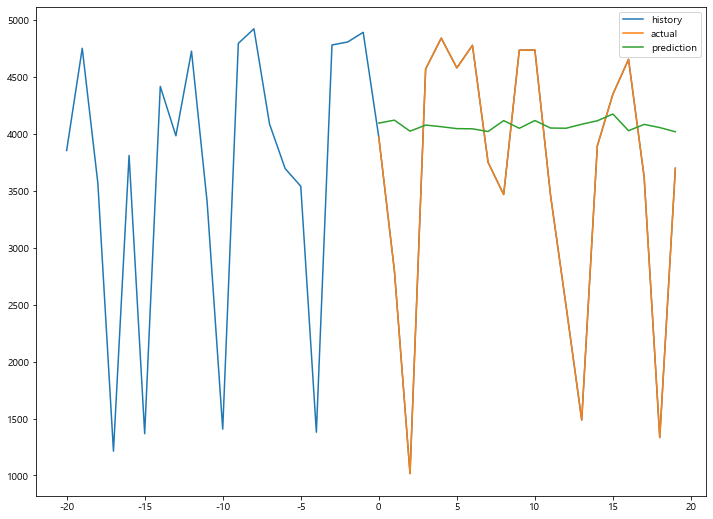

In [32]:
plt.figure(figsize=(12, 9))
plt.plot(x,y, label='history')

plt.plot(test_label[n], label = 'actual')   # history와 겹치면 삭제O
plt.plot(pred[n], label = 'prediction')

plt.legend()
plt.show()

In [23]:
# 성능

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

actual = test_label[0]
predict = pred[0]

# print(f'r2_score : {r2_score(actual, predict)}')
print(f'MAE : {mean_absolute_error(actual, predict)}')
print(f'MSE : {mean_squared_error(actual, predict)}')
print(f'RMSE : {np.sqrt(mean_squared_error(actual, predict))}')
# print(f'RMSLE : {np.sqrt(mean_squared_log_error(actual, predict))}')#?


MAE : 869.067822265625
MSE : 872938.3893766642
RMSE : 934.3117195971932


In [36]:
test_label[39] - pred[39]

array([ -124.1953125 , -1322.10595703, -3005.21533203,   492.11987305,
         777.34619141,   533.25292969,   732.90698242,  -270.34033203,
        -649.04492188,   685.43579102,   619.24121094,  -587.93579102,
       -1562.09838867, -2596.12597656,  -220.74902344,   175.21484375,
         626.38427734,  -461.94897461, -2720.8894043 ,  -320.45214844])

In [34]:
pred[39]

array([4093.1953, 4119.106 , 4022.2153, 4075.8801, 4061.6538, 4044.747 ,
       4043.093 , 4019.3403, 4115.045 , 4047.5642, 4115.759 , 4049.9358,
       4048.0984, 4083.126 , 4113.749 , 4172.785 , 4026.6157, 4081.949 ,
       4053.8894, 4017.4521], dtype=float32)

In [24]:
# r2_score : 결정계수 (1)
# mean_absolute_error(MAE) : 오류의 평균값(절댓값 사용)
# mean_squared_error(MSE) : 오류 제곱 후 성능평가 
# np.sqrt(mean_squared_error)(RMSE) : 평균제곱근오차 / MSE에 root 
# mean_squared_log_error : RMSE에 log 

# 성능평가 해석
# # mae : 해당 모델 사용 시 +- 500 ~ 606명 오차발생   

test 전체 (2021.10.13 ~ 12.31)   
예측값이 존재하는 일자는 (11.2 ~ 12.31)   
- 첫 20일 (11.2 ~ 11.21)
- 중간 20일 (11.22 ~ 12.11)
- 마지막 20일 (12.12 ~ 12.31)

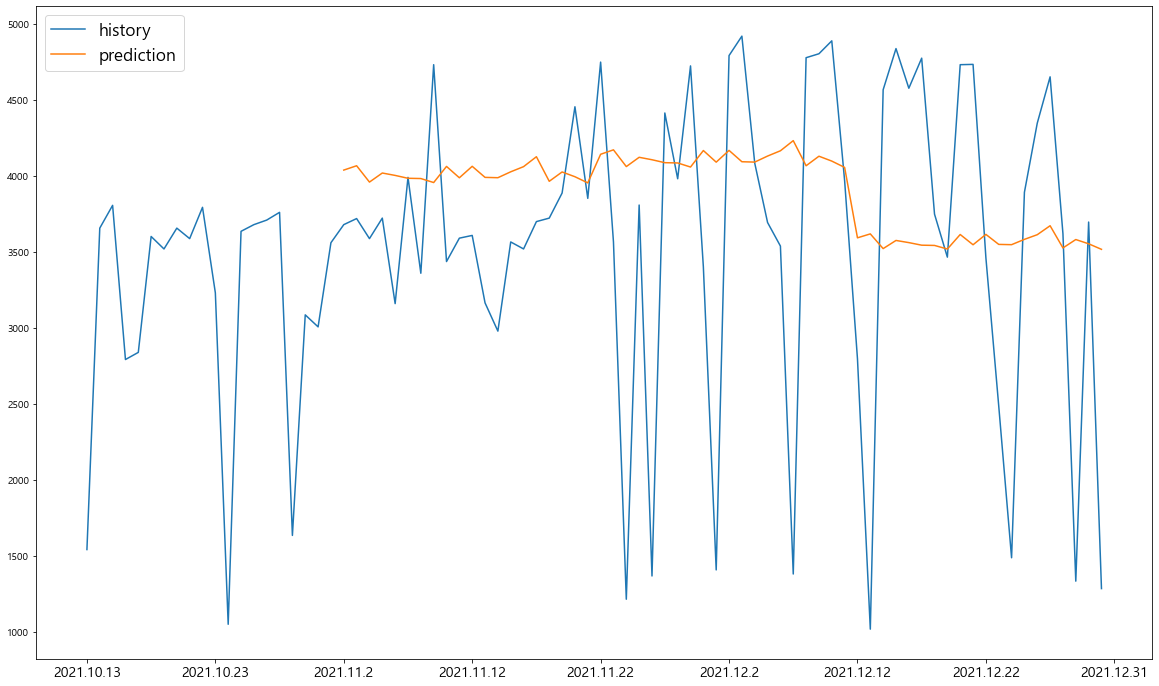

In [25]:
# test data 전체 예측

pred_all = np.concatenate((pred[0], pred[20], pred[39]))
actual = test[label_cols]['user_count'].tolist()
x = list(range(-20, 60))    # actual + 20 = pred[0]이므로 
y = actual

plt.figure(figsize=(20,12))
plt.plot(x, y, label='history')
plt.plot(pred_all-500, label='prediction')

plt.xticks([-20, -10, 0, 10, 20, 30, 40, 50, 60],
            labels=['2021.10.13', '2021.10.23', '2021.11.2', '2021.11.12', '2021.11.22', '2021.12.2', '2021.12.12', '2021.12.22', '2021.12.31'])
plt.tick_params(axis = 'x', labelsize = 14)
plt.legend(loc='upper left', fontsize = 17)

plt.show()

### - ETS

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
result = seasonal_decompose(data['user_count'], model='additive', freq=1)

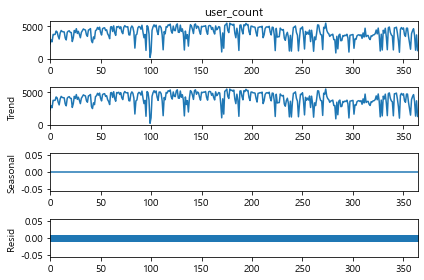

In [28]:
result.plot();